# Matplotlib and Seaborn Part-1

## Bar Charts

A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's <code>countplot</code> function:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
print (pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


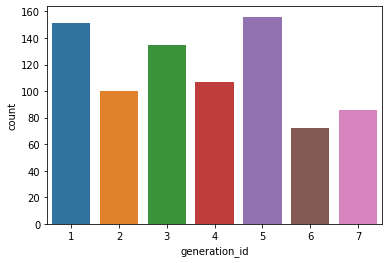

In [3]:
sb.countplot(data = pokemon, x = 'generation_id')

For the example given, you can see that the Beta level has the highest frequency at over 100 counts, followed by Gamma and Alpha, with Delta the least frequent at around 50. By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

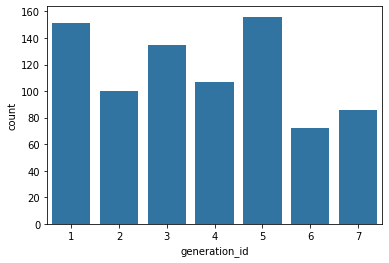

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

<code>color_palette</code> returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

In [5]:
get_order = pokemon['generation_id'].value_counts().index

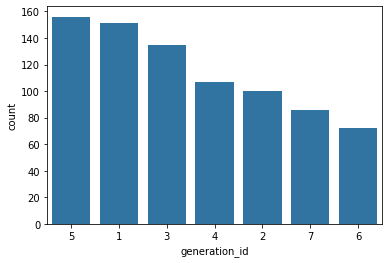

In [6]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = get_order)

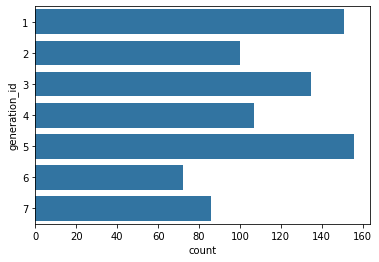

In [7]:
sb.countplot(data = pokemon, y = 'generation_id', color = base_color)

Alternatively, you can use matplotlib's <code>xticks</code> function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

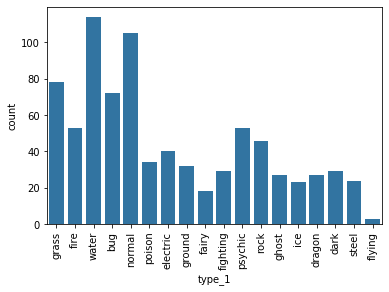

In [8]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.xticks(rotation = 90)

## Absolute vs. Relative Frequency

By default, seaborn's countplot function will summarize and plot the data in terms of **absolute frequency**, or pure counts.In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of __relative frequency__, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [9]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = pokemon.shape[0]
max_count = pokemon['type_2'].value_counts().max()
max_prop = max_count/n_points
#print(max_prop)

In [10]:
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

Text(0, 0.5, 'proportion')

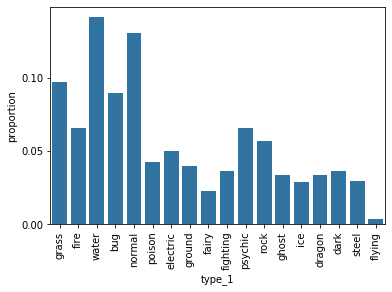

In [11]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.xticks(rotation = 90)
plt.ylabel('proportion')

The <code>xticks</code> and <code>yticks</code> functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.
I've also added a <code>ylabel</code> call to make it clear that we're no longer working with straight counts.

## Additional Variation

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

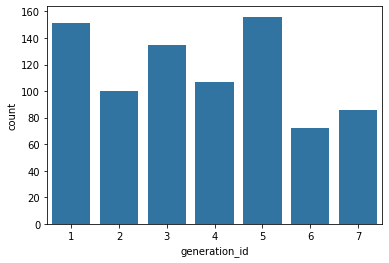

In [12]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

#add annotations
n_points = pokemon.shape[0]
cat_counts = pokemon['generation_id'].value_counts()
locs, labels = plt.xticks()

In [13]:
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    #print the annnotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

KeyError: '1'

## Pie Charts

A __pie chart__ is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.
- If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

You can create a pie chart with matplotlib's pie function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

In [ ]:
#code for the pie chart seen above
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts,labels = sorted_counts.index, startangle =90, counterclock = False)
plt.axis('square')

To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.

## Additional Variation

A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.
To create a donut plot, you can add a "wedgeprops" argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

In [ ]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

## Histograms

A __histogram__ is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's <code>hist</code> function:

In [ ]:
plt.hist(data = pokemon, x = 'speed')

You can see that there are eight data points that fall in the range between about 0 and 2.5 in the leftmost bin, and nine points in the range from about 2.5 to 5 in the adjacent bin. Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).
By default, the <code>hist</code> function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret. Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?
You can use descriptive statistics (e.g. via <code>df['num_var'].describe()</code>) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's <code>arange</code> function:

In [ ]:
bin_edges= np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because <code>arange</code> will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

In [ ]:
plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
bin_edges= np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

plt.subplot(1,2,2)
bin_edges= np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

This example puts two plots side by side through use of the <code>subplot</code> function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The <code>figure()</code> function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

## Alternative Approach

The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

In [ ]:
sb.distplot(pokemon['speed'])

When we specify the data to be plotted, note that the first argument must be the Series or array with the points to be plotted. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and <code>countplot</code> and <code>hist</code>.

The <code>distplot</code> function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.
Despite the fact that the default bin-selection formula used by <code>distplot</code> might be better than the choice of ten bins that <code>.hist</code> uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

In [ ]:
bin_edges= np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

The result of the code above is exactly like the histogram above with bin width of 1. The units of the vertical axis are also back in terms of counts. 
In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by <code>distplot</code>, then you might be better off with just using Matplotlib's <code>hist</code> function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

## Figures, Axes, and Subplots

At this point, you've seen and had some practice with some basic plotting functions using matplotlib and seaborn. The previous page introduced something a little bit new: creating two side-by-side plots through the use of matplotlib's <code>subplot()</code> function. If you have any questions about how that or the <code>figure()</code> function worked, then read on. This page will discuss the basic structure of visualizations using matplotlib and how subplots work in that structure.

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

In [ ]:
plt.hist(data = pokemon, x = 'speed')

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125,.775,.755])
ax.hist(data = pokemon, x = 'speed')

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125,.775,.755])
sb.countplot(data = pokemon, x = 'speed', color = base_color,ax = ax)

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how <code>subplot()<\code> was used on the Histograms page:

First of all, <code>plt.figure(figsize = [10, 5])</code>creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.
Then, <code>plt.subplot(1, 2, 1)</code> creates a new Axes in our Figure, its size determined by the <code>subplot()</code> function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the <code>plt.hist()</code> call comes, the histogram is plotted in the left-side subplot.
Finally, <code>plt.subplot(1, 2, 2)</code> creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next <code>plt.hist()</code> call comes, the histogram gets drawn in the right-side subplot.

In [ ]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots
# example of somewhat too-large bin size
plt.subplot(1,2,1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)
# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

## Additional Techniques

To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.
If you don't assign Axes objects as they're created, you can retrieve the current Axes using <code>ax = plt.gca()</code>, or you can get a list of all Axes in a Figure fig by using <code>axes = fig.get_axes()</code>. As for creating subplots, you can use <code>fig.add_subplot()</code> in the same way as <code>plt.subplot()</code> above. If you already know that you're going to be creating a bunch of subplots, you can use the <code>plt.subplots()</code> function:

In [ ]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()# reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i])# set the current Axes
    plt.text(0.5, 0.5, i+1)# print conventional subplot index number to middle of Axes

As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through <code>subplot()</code>. (Reference: <code>plt.sca()</code>, <code>plt.text()</code>)

## Descriptive Statistics, Outliers, and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.
Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

In [ ]:
plt.figure(figsize = [10, 5])

#histogram on left: full data
plt.subplot(1,2,1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)

#histogram on right: focus in on bulk of data < 6
plt.subplot(1,2,2)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.xlim((0,6))

In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 6 to those that take values greater than 6. For anything that is concentrated on the bulk of the data in the former group (< 6), use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 6).

## Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. 

Text(0.5, 0, 'Weight (kg)')

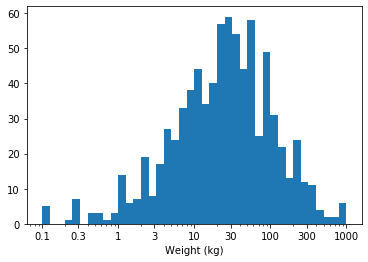

In [15]:
pokemon = pd.read_csv('./data/pokemon.csv')
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')